In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Toyota_data = pd.read_csv("ToyotaCorolla - MLR.csv") #load the dataset
Toyota_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


**Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

**EDA**

In [ ]:
Toyota_data.shape
#there are 11 columns and 1436 rows in the dataset

(1436, 11)

In [ ]:
Toyota_data.info()
#there is only one categorical column and 10 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
Toyota_data.isnull().sum()
#No null values in the given dataset

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
#to check datatypes
Toyota_data.dtypes

1

In [ ]:
Toyota_data["Fuel_Type"].unique()
#there are 3 different fuel types in the given dataset

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
Toyota_data[Toyota_data.duplicated()] #There is one duplicate value from the output


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
Toyota_data.drop(index=112,inplace=True) # Deleting duplicate row
Toyota_data.duplicated().sum()

0

**summary statistics of the variables**

In [ ]:
Toyota_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


**Data Visualizations**

<Axes: >

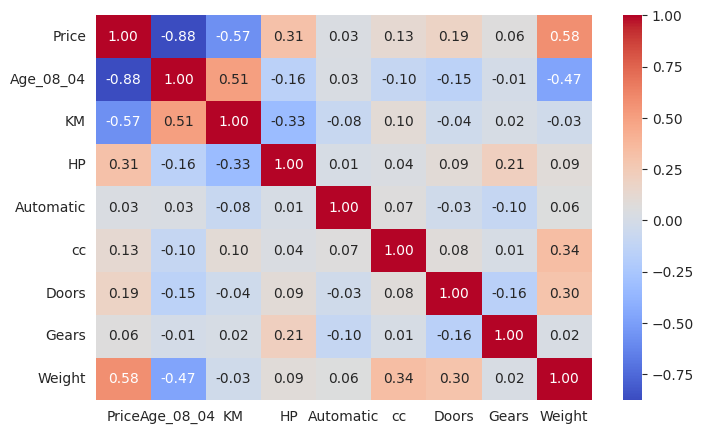

In [ ]:
#correlation coefficient
numeric_data = Toyota_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr().drop(index=['Cylinders'],columns=['Cylinders'])
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")


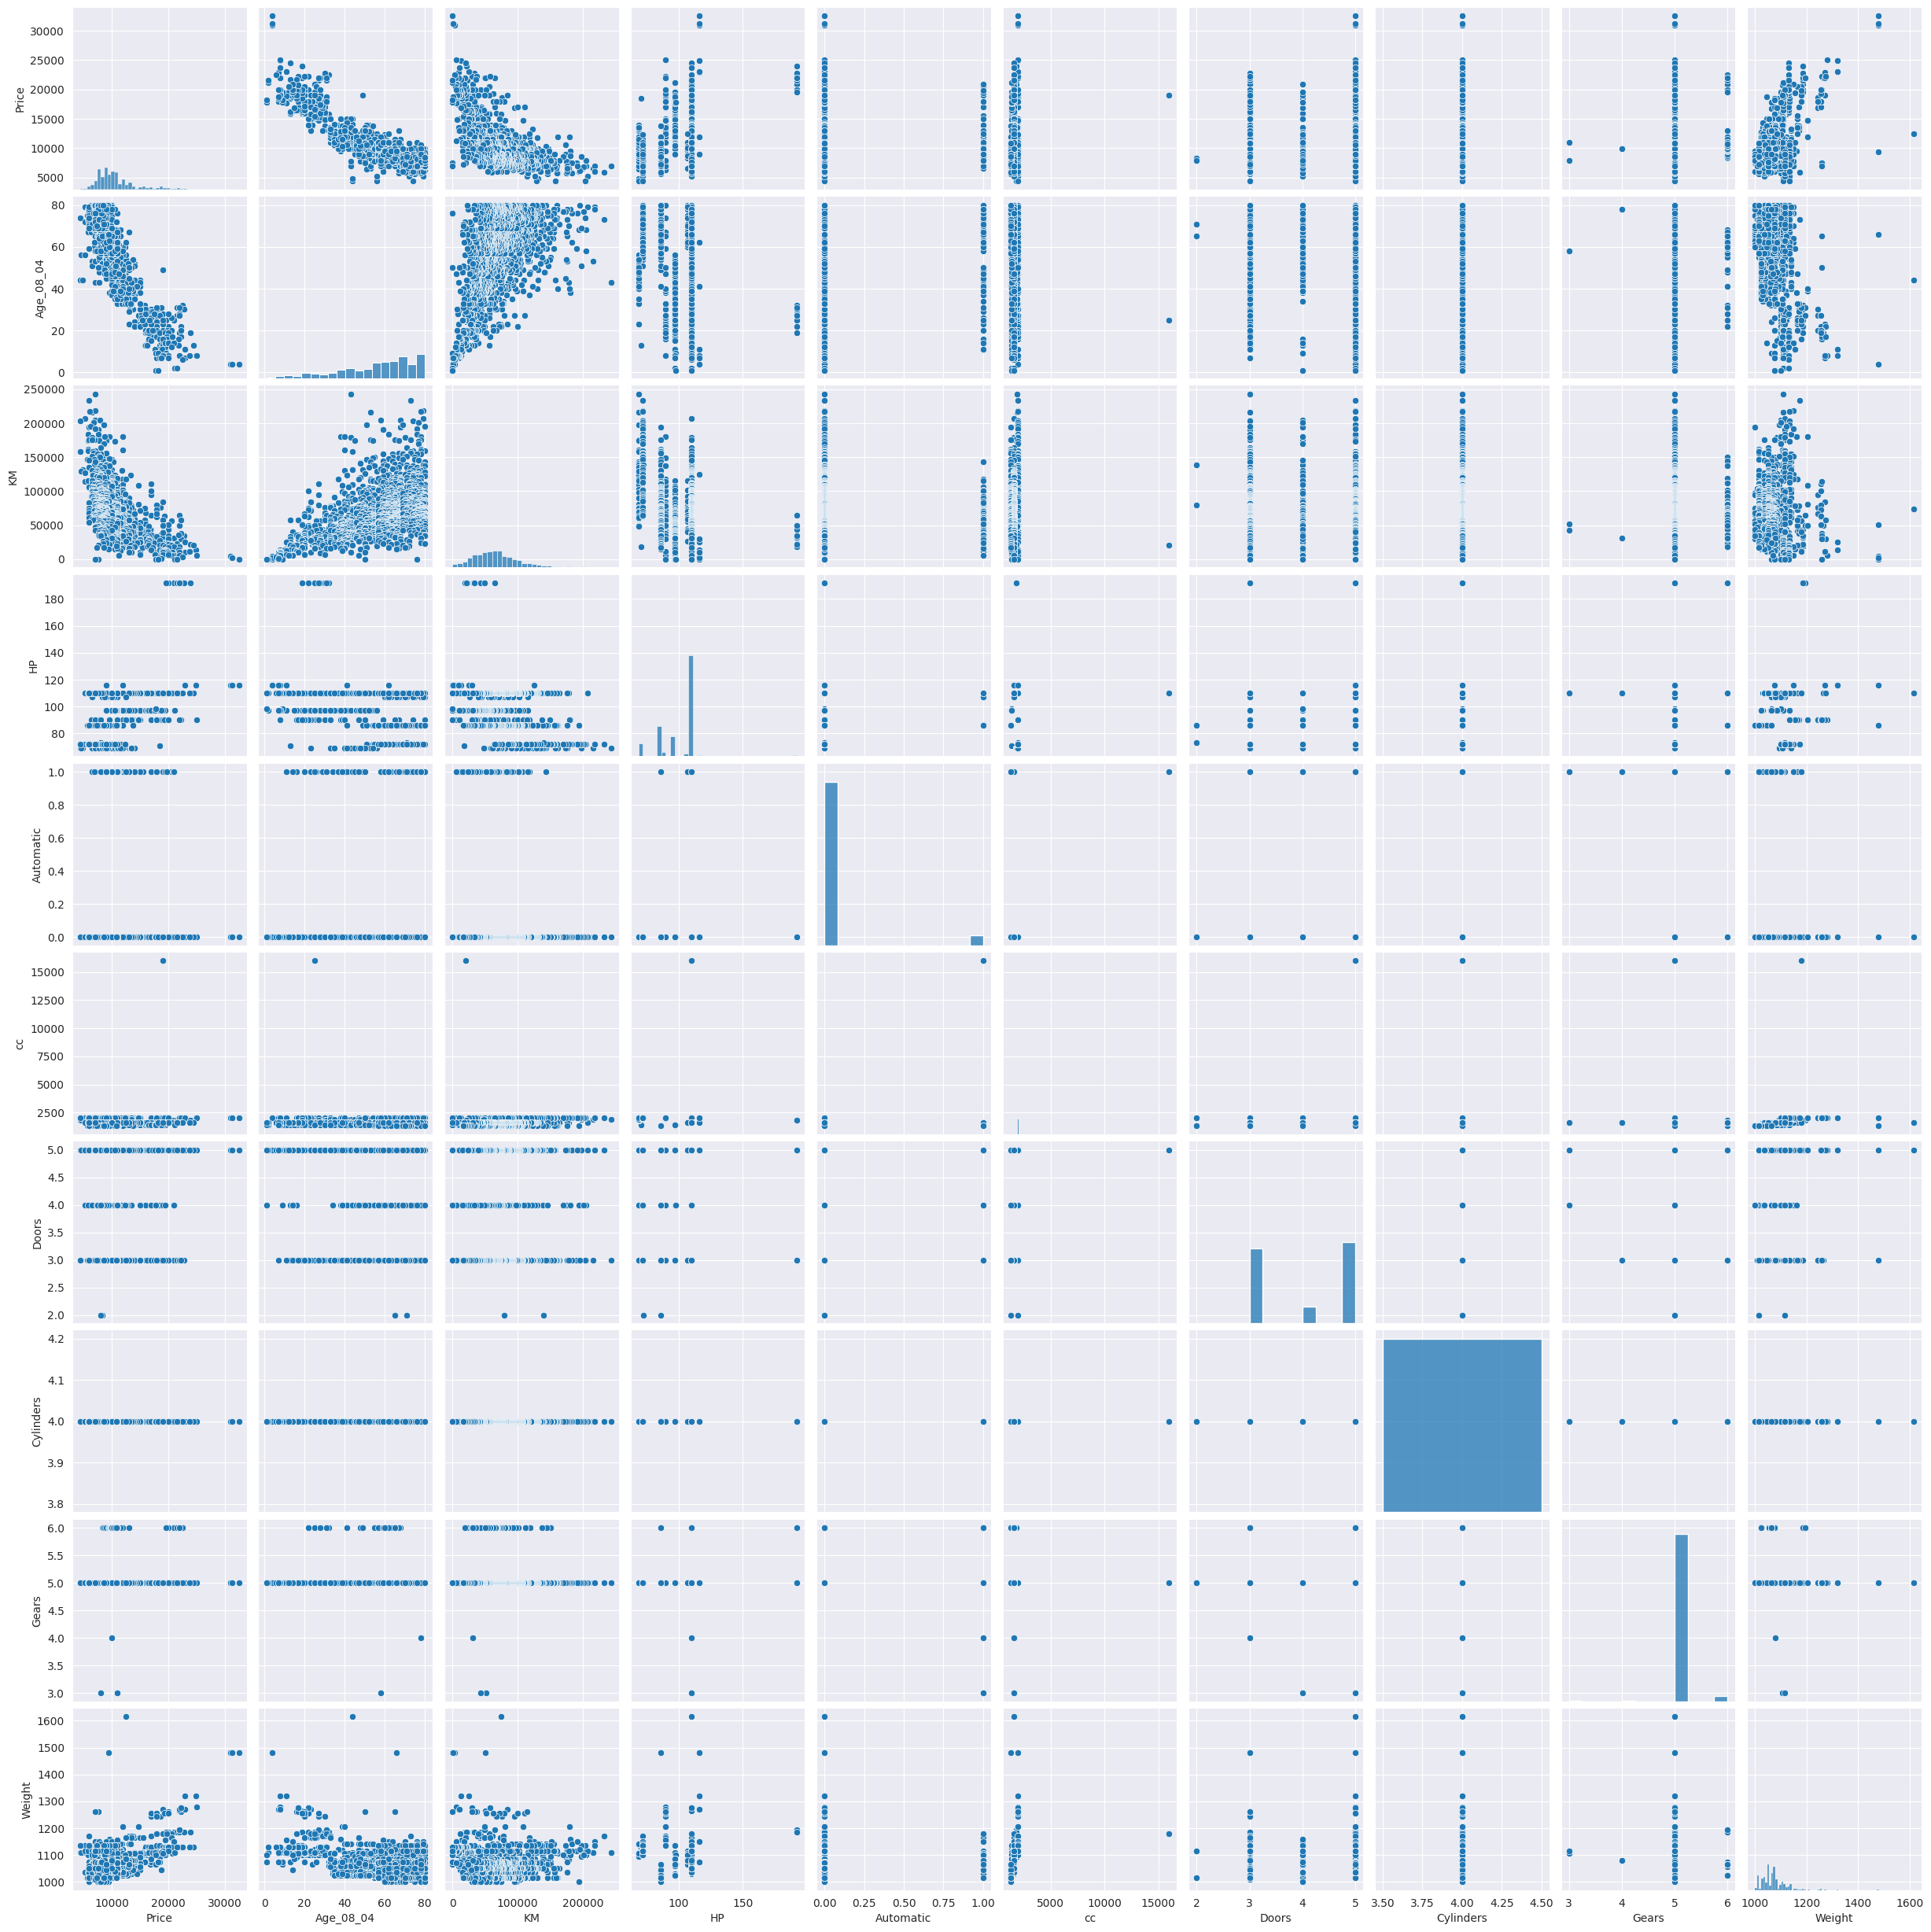

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Toyota_data)

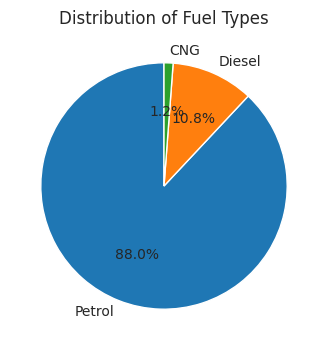

In [ ]:
# Bar chart to count the occurrences of each fuel type
fuel_counts = Toyota_data['Fuel_Type'].value_counts()
# Plot a pie chart
plt.figure(figsize=(5, 4))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')
plt.show()

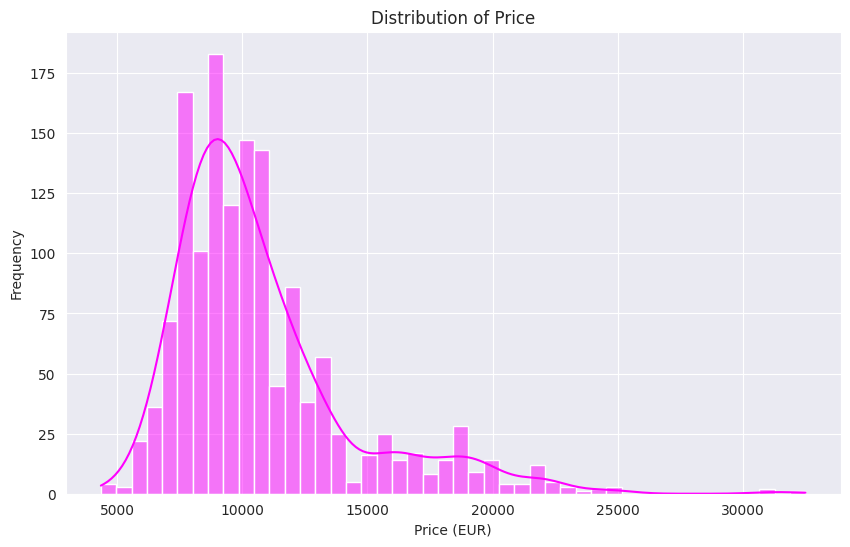

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Toyota_data['Price'], kde=True, color='Magenta')
plt.title("Distribution of Price")
plt.xlabel("Price (EUR)")
plt.ylabel("Frequency")
plt.show()

**Data Preprocessing**

In [ ]:
# One-hot encode Fuel_Type
Toyota_data = pd.get_dummies(Toyota_data, columns=['Fuel_Type'], dtype='int')
Toyota_data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


In [ ]:
Toyota_data.shape

(1436, 13)

In [ ]:
# Normalize/Standardize Numerical Features:
scaler = StandardScaler()
numerical_columns = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']
Toyota_data[numerical_columns] = scaler.fit_transform(Toyota_data[numerical_columns])
Toyota_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,-1.777268,-0.575958,Diesel,-0.767351,0,0.998113,3,4,5,1.774964
1,13750,-1.777268,0.116474,Diesel,-0.767351,0,0.998113,3,4,5,1.774964
2,13950,-1.723380,-0.716707,Diesel,-0.767351,0,0.998113,3,4,5,1.774964
3,14950,-1.615603,-0.548902,Diesel,-0.767351,0,0.998113,3,4,5,1.774964
4,13750,-1.400049,-0.802384,Diesel,-0.767351,0,0.998113,3,4,5,1.870688


**Split the dataset into training and testing sets (e.g., 80% training, 20% testing)**

In [ ]:
  # All features as independent variables
X = data.drop('Price', axis=1)
y = data['Price']  # Price as the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

**Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset. Apply Lasso and Ridge methods on the model.**


In [ ]:
# Model 1: Linear Regression
# Build a multiple linear regression model using the training dataset
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model 3: Lasso Model
# Build a multiple Lasso regression model using the training dataset
lasso = Lasso(alpha=0.01)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
# Model 2: Ridge Model
# Build a multiple Ridge regression model using the training dataset

ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Evaluate models
models = {'Linear Regression': linear, 'Lasso Regression': lasso, 'Ridge Regression': ridge}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R²): {r2:.2f}\n")


Linear Regression Performance:
  Mean Squared Error (MSE): 2203043.82
  Root Mean Squared Error (RMSE): 1484.27
  Mean Absolute Error (MAE): 990.89
  R-squared (R²): 0.83

Ridge Regression Performance:
  Mean Squared Error (MSE): 2199746.37
  Root Mean Squared Error (RMSE): 1483.15
  Mean Absolute Error (MAE): 990.73
  R-squared (R²): 0.84

Lasso Regression Performance:
  Mean Squared Error (MSE): 2202966.39
  Root Mean Squared Error (RMSE): 1484.24
  Mean Absolute Error (MAE): 990.89
  R-squared (R²): 0.83



Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. A smaller MSE indicates a better fit. Here, Lower values indicate better predictions.

Root Mean Squared Error (RMSE): It gives us the error in the same unit as the target variable (Price).

Mean Absolute Error (MAE): Represents the average of the absolute differences between predicted and actual values.

Both RMSE and MAE provide insights into the magnitude of errors in predictions. Smaller values indicate better performance.

R-squared (R²): Represents the proportion of variance explained by the model. A higher value (closer to 1) indicates better model performance. Here, Close to 1 indicates that the model explains most of the variance in Price. Higher R² values are preferred.

In [ ]:
# Interpret the coefficients of the model.
print("Model Coefficients for each model:")
print("Linear Regression Coefficients:", linear.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)


Model Coefficients for each model:
Linear Regression Coefficients: [ 1.00000000e+00  5.00475322e-15  6.44264259e-15 -7.53161797e-15
 -1.20529142e-13 -4.02086942e-17  9.52320364e-14  1.00406377e-20
  1.24983370e-13 -8.18176806e-16 -1.85759677e-13 -9.70966488e-14]
Ridge Regression Coefficients: [ 9.99999999e-01 -6.18674186e-08 -8.36183914e-12  7.24380161e-09
  7.52453226e-08 -1.56242394e-11 -3.06873127e-08  0.00000000e+00
  2.77770621e-07  1.32266012e-08 -6.59997611e-08  6.63318440e-07]
Lasso Regression Coefficients: [ 9.99999999e-01 -0.00000000e+00 -4.58252971e-11  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [ ]:
#Interpret the coefficients of the Linear Regression model.
for i,j in enumerate(X.columns): #Finding the coefficients of each column in the dataset
    print(f"coefficient of {j}: {linear.coef_[i]}")

coefficient of Age_08_04: -120.83045817097117
coefficient of KM: -0.016231410612674253
coefficient of HP: 14.039478769759068
coefficient of Automatic: 148.83092691181997
coefficient of cc: -0.030372194607027406
coefficient of Doors: -60.31097437498872
coefficient of Cylinders: -1.6200374375330284e-12
coefficient of Gears: 551.6007102659818
coefficient of Weight: 25.884958313274495
coefficient of Fuel_Type_Diesel: -68.54875675828677
coefficient of Fuel_Type_Petrol: 1370.80890981598


In [ ]:
#Interpret the coefficients of the Lasso Regression model.
for i,j in enumerate(X.columns): #Finding the coefficients of each column in the dataset
    print(f"coefficient of {j}: {lasso.coef_[i]}")

coefficient of Age_08_04: -120.83013391740928
coefficient of KM: -0.01623235184847824
coefficient of HP: 14.044676230435464
coefficient of Automatic: 148.67663287203652
coefficient of cc: -0.030392461210353786
coefficient of Doors: -60.29459608745454
coefficient of Cylinders: 0.0
coefficient of Gears: 551.3064776102499
coefficient of Weight: 25.883328345222395
coefficient of Fuel_Type_Diesel: -68.18636222436528
coefficient of Fuel_Type_Petrol: 1370.744742425982


In [ ]:
#Interpret the coefficients of the Ridge Regression model.
for i,j in enumerate(X.columns): #Finding the coefficients of each column dataset
    print(f"coefficient of {j}: {ridge.coef_[i]}")

coefficient of Age_08_04: -120.77965945868489
coefficient of KM: -0.01632407954257201
coefficient of HP: 14.141834012008454
coefficient of Automatic: 146.90746971608692
coefficient of cc: -0.030509438556815142
coefficient of Doors: -59.90579131646386
coefficient of Cylinders: 0.0
coefficient of Gears: 542.2723281414661
coefficient of Weight: 25.821019441618798
coefficient of Fuel_Type_Diesel: -128.81307202315784
coefficient of Fuel_Type_Petrol: 1294.949825898636


#Interview Questions




***1.What is Normalization & Standardization and how is it helpful?***

*Normalization:* It is a scaling technique used to reduce redundancy in which the values are shifted and scaled in a between 0 and 1.

Normalized value = (value - min_value) / (max_value - min_value)


*standardization:* Standardization scales features to have a mean of 0 and a standard deviation of 1.

Standardized value = (value - mean) / standard deviation

*Why are they helpful?*


*   they help machine learning models to perform optimally by balancing the impact of features and  improving convergence rates in rare cases.
*   they are helpful in fair future comparison.
*   when you need a bounded range, normalization is helpful.
*   Standardization can be a better choice if your data contains many outliers as it scales the data based on the standard deviation.

***2.What techniques can be used to address multicollinearity in multiple linear regression?***

*   correlation matrix can be used to identify and remove redundant variables.
*   Calculate Variance Inflation Factor (VIF) for each feature and remove features with high VIF
*   Use models like Ridge or Lasso regression, which penalize large coefficients.
*   dimensionality reduction techniques like PCA helps to create uncorrelated components.





